In [1]:
using Graphs, MetaGraphsNext

includet("../../utils/import_utils.jl")
includet("../../utils/visu.jl")
includet("io.jl")
#includet("io.jl")

In [14]:
function read_graph_from_file(filename)
    open(filename, "r") do file
        lines = readlines(file)
        name="rfuwu"

        # create some nice graph
        mg = MetaGraph(
            Graph(),
            Int,
            Dict,
            Dict,
            Dict(:name=>"s_" * name, :type=>"substrate")
        )


        # Read nodes
        num_nodes = parse(Int, split(lines[1])[2])
        println("The graph has $num_nodes nodes")
        line_idx = 3

        for i_node in 1:num_nodes
            #println("Current line : $(lines[line_idx])")
            parts = split(lines[line_idx])
            name = parts[1]
            x = parts[2]
            y = parts[3]
            #println("Well you got this : $name")

            line_idx += 1
            cap_to_put = 1
            cost_to_put = rand(2:4)
            add_vertex!(mg, i_node, Dict(:cap=> cap_to_put, :cost => cost_to_put))
        end
        
        # Read edges
        line_idx += 1  # Skip "EDGES X" and header
        num_edges = parse(Int, split(lines[line_idx])[2])
        println("There is $num_edges edges")
        line_idx += 2  # Skip "EDGES X" and header

        for _ in 1:num_edges
            parts = split(lines[line_idx])
            src = parse(Int, parts[2]) + 1  # Convert to 1-based index
            dst = parse(Int, parts[3]) + 1
            
            cap_to_put = rand(2:4)
            cost_to_put = rand(2:4)
            
            if has_edge(mg, src, dst)
                #println("Well the graph already has it you see...")
            else
                add_edge!(mg, src, dst, Dict(:cap=>cap_to_put, :cost =>cost_to_put))
            end
            line_idx += 1
        end

        println("At the end, we have $(nv(mg)) nodes and $(ne(mg)) edges")
        return mg

    end
end



read_graph_from_file (generic function with 1 method)

The graph has 199 nodes
There is 1044 edges
At the end, we have 199 nodes and 522 edges


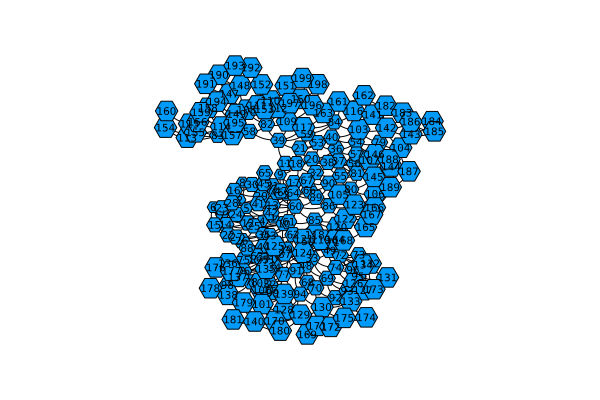

In [25]:
path = "2015DEFO/synth200_unary_hard.graph"
#path = "RocketFuel/rf1221_real_hard.graph"
mg = read_graph_from_file(path)

visu_graph(mg)

In [17]:
function put_as_substrate_and_save(g)
    mg = MetaGraph(
        Graph(),
        Int,
        Dict,
        Dict,
        Dict(:name=>"s_" * name, :type=>"substrate")
    )

    for node in vertices(g)
        cap_to_put = 1
        cost_to_put = rand(2:4)
        add_vertex!(mg, node, Dict(:cap=> cap_to_put, :cost => cost_to_put))
    end

    for edge in edges(g)
        cap_to_put = rand(2:4)
        cost_to_put = rand(2:4)
        add_edge!(mg, src(edge), dst(edge), Dict(:cap=>cap_to_put, :cost =>cost_to_put))
    end

    write_network_to_json(mg, false)
end

function put_as_virtual_and_save(g)
    mg = MetaGraph(
        Graph(),
        Int,
        Dict,
        Dict,
        Dict(:name=>"v_" * name, :type=>"virtual")
    )

    for node in vertices(g)
        add_vertex!(mg, node, Dict(:dem=> 1))
    end

    for edge in edges(g)
        add_edge!(mg, src(edge), dst(edge), Dict(:dem=>1))
    end

    write_network_to_json(mg, false)
end


put_as_virtual_and_save (generic function with 1 method)

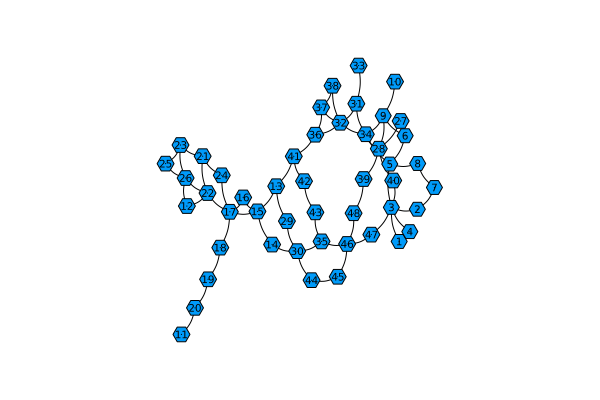

In [18]:
path = "topologyzoo/Bellcanada.gml"

g, name = get_graph_from_gml(path)

visu_graph(g)

In [15]:
println("Graph with $(nv(g)) nodes and $(ne(g)) arretes")

Graph with 110 nodes and 148 arretes


In [16]:
put_as_substrate_and_save(g)

11943

In [19]:
put_as_virtual_and_save(g)

3962

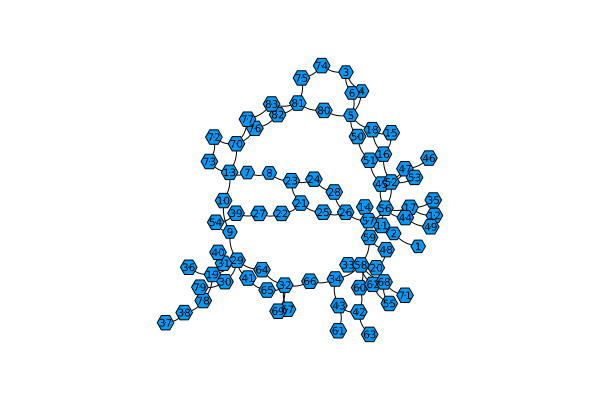

In [100]:
rem_vertex!(g, 7)

visu_graph(g)